In [1]:
%pylab inline
from datetime import date
from scipy.fftpack import fft
from scipy.signal import *
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
arr=genfromtxt("DeepCove_temperature.txt")  

In [3]:
tt_start=arr[0] -(7.0/24)  # starting time; convert UTC to local time
tt_end=arr[1] -(7.0/24)    # end time
NT=arr[2]                  # total number of datapoints in minute resolution

In [10]:
day1=date.toordinal(date(2017,6,1))+366  # python decimal time string shift of 366 days
day2=date.toordinal(date(2017,9,1))+366 

day3=date.toordinal(date(2016,12,1))+366  # python decimal time string shift of 366 days
day4=date.toordinal(date(2017,3,1))+366 

In [11]:
daymin=24*60                         #length of a day in min 
day1_start=int(3+(day1-tt_start)*daymin)#find the start position in arr
day2_start=int(3+(day2-tt_start)*daymin)

day3_start=int(3+(day3-tt_start)*daymin)#find the start position in arr
day4_start=int(3+(day4-tt_start)*daymin)
data1=arr[day1_start:day2_start] #find the temp on specific day
data2=arr[day3_start:day4_start]

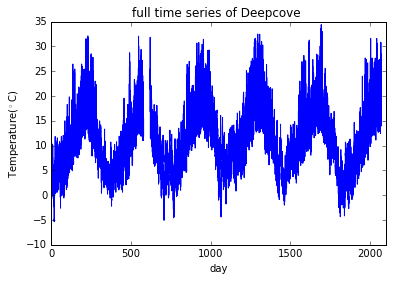

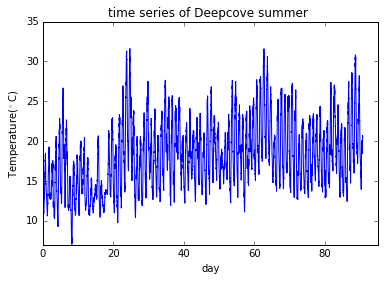

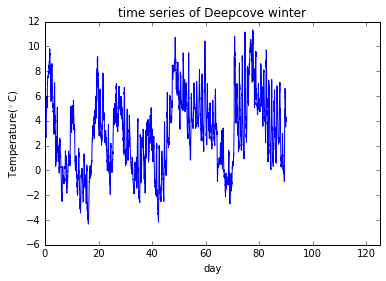

In [12]:
figure(1)
data=arr[3:]
x_day=linspace(0,len(data)-1,len(data))   #a day in minute resolution
figure(1)
plot(x_day/daymin,data)
xlim(0,2100)

xlabel('day')
ylabel('Temperature($^\circ$C)')
title('full time series of Deepcove ')

x_day=linspace(0,len(data1)-1,len(data1))   #a day in minute resolution
figure(2)
plot(x_day/daymin,data1)
xlim(0,95)
ylim(7,35)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('time series of Deepcove summer ')

x_day=linspace(0,len(data2)-1,len(data2))
figure(3)
plot(x_day/daymin,data2) 
xlim(0,125)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('time series of Deepcove winter' )

In [13]:
data1=data1[~numpy.isnan(data1)]
data2=data2[~numpy.isnan(data2)]

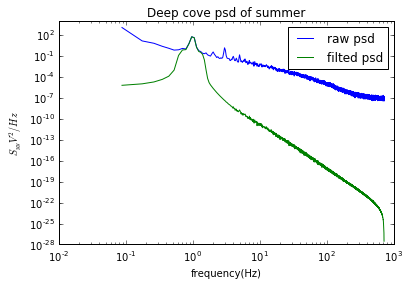

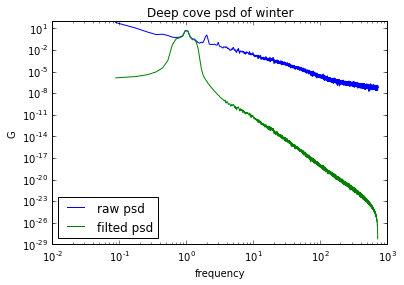

In [14]:
fsamp=24*60
num=2**14
figure(1)
rawg,rawf=mlab.psd(data1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)


loglog(rawf,rawg,label='raw psd')
title('Deep cove psd of summer')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

fnyq=fsamp/2.0
b, a = signal.ellip(5, 0.5, 40, 0.7/fnyq , 'high', analog=False)


c, d = signal.ellip(5, 0.5, 40, 1.4/fnyq , 'low', analog=False)


hfiltered=signal.filtfilt(b,a,data1)
filted1=signal.filtfilt(c,d,hfiltered)

hfg,hff=mlab.psd(filted1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(hff,hfg,label='filted psd')

xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')
legend(loc='best')

figure(2)
rawg,rawf=mlab.psd(data2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)


loglog(rawf,rawg,label='raw psd')
title('Deep cove psd of winter')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

fnyq=fsamp/2.0
b, a = signal.ellip(5, 0.5, 40, 0.7/fnyq , 'high', analog=False)


c, d = signal.ellip(5, 0.5, 40, 1.4/fnyq , 'low', analog=False)


hfiltered=signal.filtfilt(b,a,data2)
filted2=signal.filtfilt(c,d,hfiltered)

hfg,hff=mlab.psd(filted2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(hff,hfg,label='filted psd')

xlabel('frequency')
ylabel('G')
legend(loc='best')

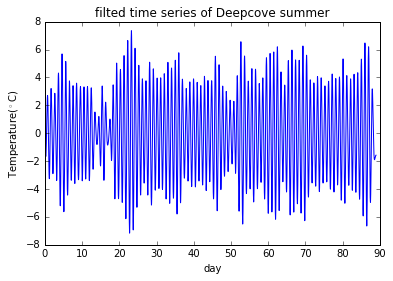

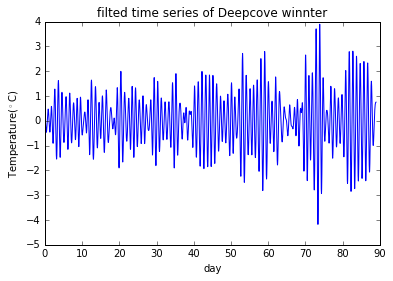

In [15]:
figure(1)
t=linspace(0,(len(data1))/fsamp-1,len(data1))
plot(t,filted1)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('filted time series of Deepcove summer' )


figure(2)
t=linspace(0,(len(data2))/fsamp-1,len(data2))
plot(t,filted2)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('filted time series of Deepcove winnter' )


In [16]:
#Deep cove
#variance in time domain
dt=1.0/fsamp

# summer
summerrawvar=( data1-mean( data1)).dot( data1-mean( data1))*dt
print 'variance of raw summer signal is :',summerrawvar
summerfiltvar=(filted1-mean(filted1)).dot(filted1-mean(filted1))*dt
print'variance of filtered summer signal is :', summerfiltvar

# winter :
rawinter = data2
winter = filted2
winterrawvar=(data2-mean(data2)).dot(data2-mean(data2))*dt
print 'variance of raw winter signal is :',winterrawvar
winterfiltvar=(filted2-mean(filted2)).dot(filted2-mean(filted2))*dt
print 'variance of filtered winter signal is :', winterfiltvar

variance of raw summer signal is : 1676.81351758
variance of filtered summer signal is : 891.475751635
variance of raw winter signal is : 852.294064961
variance of filtered winter signal is : 107.912578836


In [17]:
# estimate from the psd of diurnal:

#summer:

summerg,summerf=mlab.psd(filted1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=0)

summeres=trapz(summerg*summerg, x=summerf)
print("filtered summer variance estimated from psd is",summeres)

# winter
winterg,winterf=mlab.psd(filted2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=0)



winteres=trapz(winterg*winterg, x=winterf)
print("filtered winter variance estimated from psd is",winteres)



('filtered summer variance estimated from psd is', 364.37385300907096)
('filtered winter variance estimated from psd is', 4.4943194359662444)


In [18]:
arr=genfromtxt("JamesBay_temperature.txt")  

In [19]:
tt_start=arr[0] -(7.0/24)  # starting time; convert UTC to local time
tt_end=arr[1] -(7.0/24)    # end time
NT=arr[2]                  # total number of datapoints in minute resolution

In [20]:
day1=date.toordinal(date(2015,6,30))+366  # python decimal time string shift of 366 days
day2=date.toordinal(date(2015,10,1))+366 

day3=date.toordinal(date(2014,11,1))+366  # python decimal time string shift of 366 days
day4=date.toordinal(date(2015,3,1))+366 

In [21]:
daymin=24*60                            #length of a day in min 
day1_start=int(3+(day1-tt_start)*daymin)#find the start position in arr
day2_start=int(3+(day2-tt_start)*daymin)

day3_start=int(3+(day3-tt_start)*daymin)#find the start position in arr
day4_start=int(3+(day4-tt_start)*daymin)
data11=arr[day1_start:day2_start+daymin] #find the temp on specific day
data21=arr[day3_start:day4_start+daymin]


In [22]:
data1=data11[~numpy.isnan(data11)]
data2=data21[~numpy.isnan(data21)]

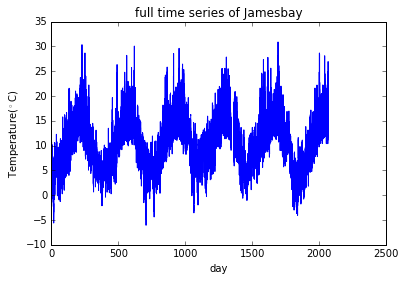

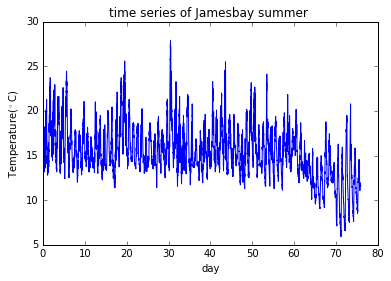

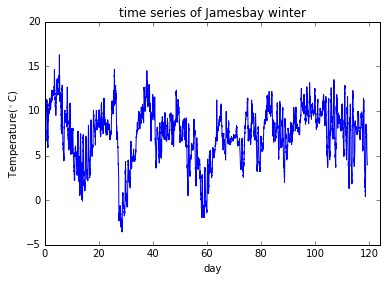

In [23]:
figure(1)
data=arr[3:]
x_day=linspace(0,len(data)-1,len(data))   #a day in minute resolution
figure(1)
plot(x_day/daymin,data)                   
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('full time series of Jamesbay')

x_day=linspace(0,len(data1)-1,len(data1))   #a day in minute resolution
figure(2)
plot(x_day/daymin,data1)                   
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('time series of Jamesbay summer ')
axis([0,len(data1)/daymin+5,5,30])

figure(3)
x_day=linspace(0,len(data2)-1,len(data2))
plot(x_day/daymin,data2)                   
axis([0,len(data2)/daymin+5,-5,20])         
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('time series of Jamesbay winter' )

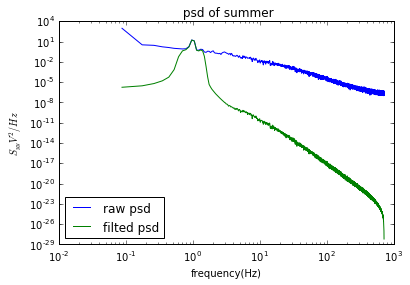

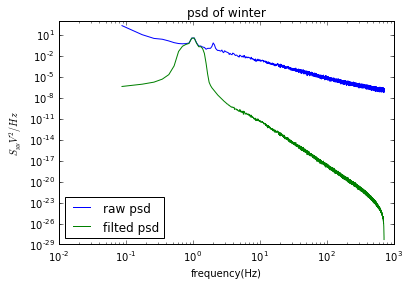

In [24]:
fsamp=24*60
num=2**14
figure(1)
rawg,rawf=mlab.psd(data1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)


loglog(rawf,rawg,label='raw psd')
title(' psd of summer')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

fnyq=fsamp/2.0
b, a = signal.ellip(5, 0.5, 40, 0.7/fnyq , 'high', analog=False)


c, d = signal.ellip(5, 0.5, 40, 1.4/fnyq , 'low', analog=False)


hfiltered=signal.filtfilt(b,a,data1)
filted1=signal.filtfilt(c,d,hfiltered)

hfg,hff=mlab.psd(filted1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(hff,hfg,label='filted psd')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

legend(loc='best')

figure(2)
rawg,rawf=mlab.psd(data2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)


loglog(rawf,rawg,label='raw psd')
title('psd of winter')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

fnyq=fsamp/2.0
b, a = signal.ellip(5, 0.5, 40, 0.7/fnyq , 'high', analog=False)


c, d = signal.ellip(5, 0.5, 40, 1.4/fnyq , 'low', analog=False)


hfiltered=signal.filtfilt(b,a,data2)
filted2=signal.filtfilt(c,d,hfiltered)

hfg,hff=mlab.psd(filted2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(hff,hfg,label='filted psd')

xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')
legend(loc='best')

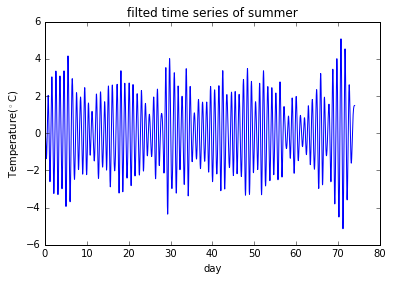

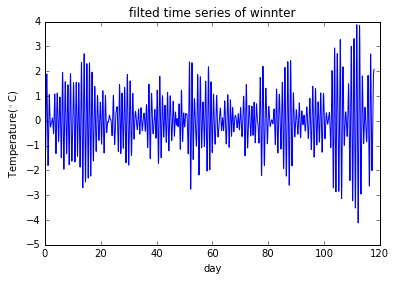

In [25]:
figure(1)
t=linspace(0,(len(data1))/fsamp-1,len(data1))
plot(t,filted1)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('filted time series of summer' )


figure(2)
t=linspace(0,(len(data2))/fsamp-1,len(data2))
plot(t,filted2)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('filted time series of winnter' )


In [26]:

#variance in time domain
dt=1.0/fsamp

# summer
summerrawvar=( data1-mean( data1)).dot( data1-mean( data1))*dt
print 'variance of raw summer signal is :',summerrawvar
summerfiltvar=(filted1-mean(filted1)).dot(filted1-mean(filted1))*dt
print'variance of filtered summer signal is :', summerfiltvar

# winter :
rawinter = data2
winter = filted2
winterrawvar=(data2-mean(data2)).dot(data2-mean(data2))*dt
print 'variance of raw winter signal is :',winterrawvar
winterfiltvar=(filted2-mean(filted2)).dot(filted2-mean(filted2))*dt
print 'variance of filtered winter signal is :', winterfiltvar

variance of raw summer signal is : 619.840007293
variance of filtered summer signal is : 248.350739187
variance of raw winter signal is : 1122.51044322
variance of filtered winter signal is : 136.680766695


In [27]:
# estimate from the psd of diurnal:

#summer:

summerg,summerf=mlab.psd(filted1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=0)

summeres=trapz(summerg*summerg, x=summerf)
print("filtered summer variance estimated from psd is",summeres)

# winter
winterg,winterf=mlab.psd(filted2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=0)



winteres=trapz(winterg*winterg, x=winterf)
print("filtered winter variance estimated from psd is",winteres)



('filtered summer variance estimated from psd is', 42.836157561216609)
('filtered winter variance estimated from psd is', 3.7634352512390321)


By comparing the covariance of the filtered summer data and the raw summer data, we see the over half of the energy is concentrated in the diurnal frequency range. The winter data has less energy in the diurnal range but it is still a very significant amount. It is reasonable to conclude that the diurnal frequency range is a more dominant time scale in the summer than in the winter.

Q2. Data gridding is a technique for adding new data points within a range of a set of known data points. Interpolation is used to fill-in missing data, smooth existing data, make predictions, and more.

(b)Spatial interpolation is the process of using points with known values to estimate values at other unknown points.
Three foundamental spatial interpolation schemes:
(1)global fitting: interpolated value is weighted by the sum of all data points, data spikes spread to all grid points. common weights: inverse squared distance, exponential decay.
(2)local gridding method: only use data close to the designed grid point based on Delaunay trianglations and vornonoi cells.
(3)Binning method: A very simple method is to bin the data, and if there are enough data that can work quite well.

Q3

In [28]:
arr=genfromtxt("AllStations_temperature_h.txt")

In [29]:
n=len(arr[0,0:])
for i in range(n):
    if arr[0,i]==236.6910 and arr[1,i]==48.4623: # to find the UvicSci in allstation data(2d-array)
        m=i
        print m
    else:
        pass
data=arr[2:,m]

33


In [30]:
from datetime import date
from scipy.fftpack import fft
from scipy.signal import *
from scipy import signal

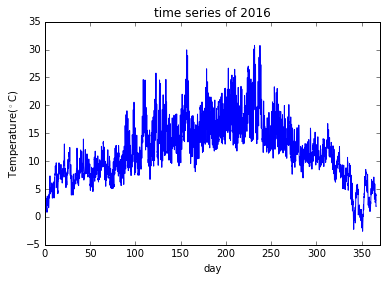

In [31]:
day1=date.toordinal(date(2016,1,1))+366 # python decimal time string shift of 366 days
day2=date.toordinal(date(2017,1,1))+366 
tt_start=arr[2,0]                        # python array starts from 0
dayhr=24                                 # length of a in hour resolution
day1_start=int(2+(day1-tt_start)*dayhr)  # find the position of 2015/12/1,0:00 in arr                                 
day2_start=int(2+(day2-tt_start)*dayhr)  # find the position of 2016/3/1,0:00 in arr

data1=data[day1_start:day2_start]     

x_day=linspace(0,len(data1)-1,len(data1))                 
figure(1)                                    
plot(x_day/24.0,data1,'blue')
xlabel('day')
xlim(0,370)
ylabel('Temperature($^\circ$C)')
title('time series of 2016')

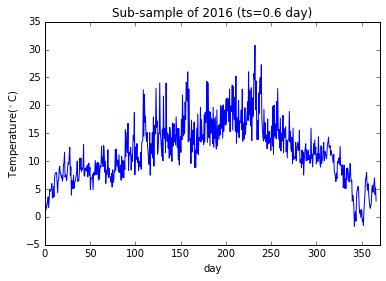

In [32]:
td=0.60
ts=int(td*24)
data3=[]
for i in range(len(data1)/ts):
    b= (i*ts)
    a=data1[b]
    data3.append(a)
data3=array(data3)
tt=linspace(0,len(data1)-1,len(data3))
figure(1)
plot ((tt/24.0),data3,'b')
xlim(0,370)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('Sub-sample of 2016 (ts=%s day)' %td)

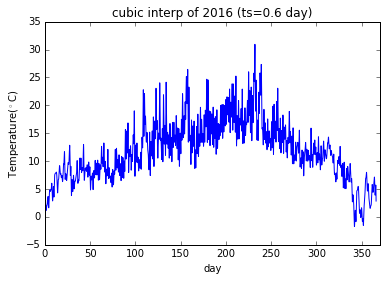

In [33]:
from scipy.interpolate import interp1d
t = np.linspace(0, len(data1)-1, num=len(data1), endpoint=True)
f1 = interp1d(tt, data3, kind='cubic')
interp=f1(t)
plot(t/24.0,interp,'b')
xlim(0,370)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('cubic interp of 2016 (ts=%s day)' %td)

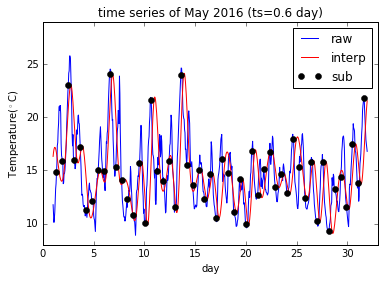

In [34]:
day3=date.toordinal(date(2016,5,1))+366 # python decimal time string shift of 366 days
day4=date.toordinal(date(2016,6,1))+366 
tt_start=arr[2,0]                        # python array starts from 0
dayhr=24                                 # length of a in hour resolution
day3_start=int(2+(day3-tt_start)*dayhr)  # find the position of 2015/12/1,0:00 in arr                                 
day4_start=int(2+(day4-tt_start)*dayhr)  # find the position of 2016/3/1,0:00 in arr

data2=data[day3_start:day4_start]     
x_day=linspace(0,len(data2)-1,len(data2))
plot(x_day/24.0+1,data2,'b-',label='raw')
xlabel('day')
xlim(0,33)
ylim(8,29)
ylabel('Temperature($^\circ$C)')
title('time series of May 2016 (ts=%s day)'%td)
ms=(day3-day1)*24
me=(day4-day1)*24
im=interp[ms:me]
plot(x_day/24.0+1,im,'r-',label='interp')
x_sub=[]
y_sub=[]
for i in range(len(data3)):
    if ms<=i*ts<me:
        x_sub.append(i*ts/24.0-ms/24.0+1)
        y_sub.append(data3[i])
    else:
        pass
x_sub=array(x_sub)
y_sub=array(y_sub)
plot(x_sub,y_sub,'ko',label='sub')
legend(loc='best')

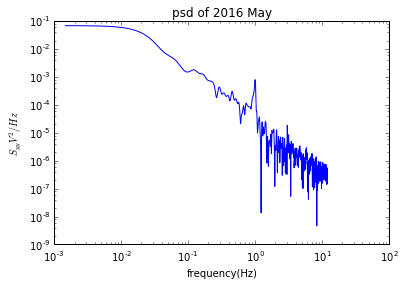

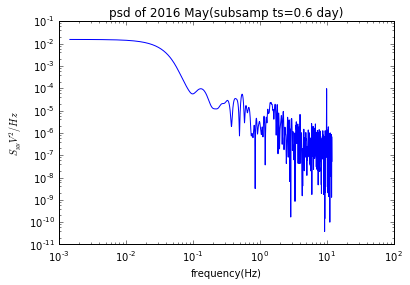

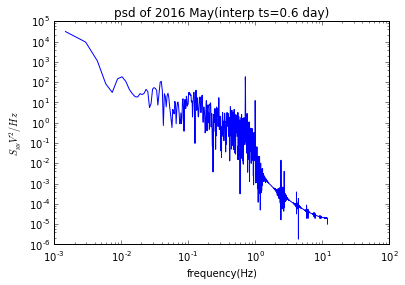

In [35]:
fsamp=24
num=2**14
figure(1)
rawg,rawf=mlab.psd(data2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(rawf,rawg,label='raw psd')
title('psd of 2016 May')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

figure(2)
rawg,rawf=mlab.psd(data3,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(rawf,rawg,label='raw psd')
title('psd of 2016 May(subsamp ts=%s day)'%td)
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

figure(3)
rawg,rawf=mlab.psd(interp,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(rawf,rawg,label='raw psd')
title('psd of 2016 May(interp ts=%s day)'%td)
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

The sub-sample and raw psd have the similar feature, the sub-sample is selected from the raw data. However,the psd of interp is different. 

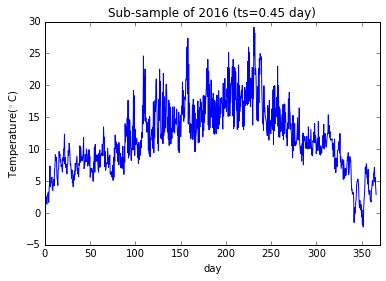

In [36]:
td1=0.45
ts1=int(td1*24)+1
data4=[]
for i in range(len(data1)/ts1):
    b= i*ts1
    a=data1[b]
    data4.append(a)
data4=array(data4)
tt1=linspace(0,len(data1)-1,len(data4))
figure(1)
plot ((tt1/24.0),data4,'b')
xlim(0,370)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('Sub-sample of 2016 (ts=%s day)' %td1)

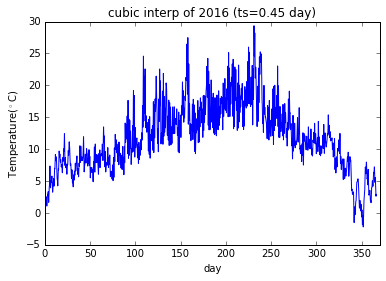

In [37]:
from scipy.interpolate import interp1d
t = np.linspace(0, len(data1)-1, num=len(data1), endpoint=True)
f11 = interp1d(tt1, data4, kind='cubic')
interp1=f11(t)
plot(t/24.0,interp1,'b')
xlim(0,370)
xlabel('day')
ylabel('Temperature($^\circ$C)')
title('cubic interp of 2016 (ts=%s day)' %td1)

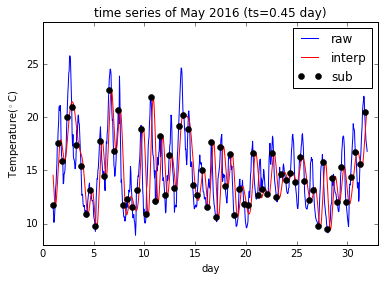

In [38]:
d60=(interp-data1)[~numpy.isnan(interp-data1)]
d45=(interp1-data1)[~numpy.isnan(interp1-data1)]
day3=date.toordinal(date(2016,5,1))+366 # python decimal time string shift of 366 days
day4=date.toordinal(date(2016,6,1))+366 
tt_start=arr[2,0]                        # python array starts from 0
dayhr=24                                 # length of a in hour resolution
day3_start=int(2+(day3-tt_start)*dayhr)  # find the position of 2015/12/1,0:00 in arr                                 
day4_start=int(2+(day4-tt_start)*dayhr)  # find the position of 2016/3/1,0:00 in arr

data2=data[day3_start:day4_start]     
x_day=linspace(0,len(data2)-1,len(data2))
plot(x_day/24.0+1,data2,'b-',label='raw')
xlabel('day')
xlim(0,33)
ylim(8,29)
ylabel('Temperature($^\circ$C)')
title('time series of May 2016 (ts=%s day)'%td1)
ms=(day3-day1)*24
me=(day4-day1)*24
imm=interp1[ms:me]
plot(x_day/24.0+1,imm,'r-',label='interp')
x_sub=[]
y_sub=[]
for i in range(len(data4)):
    if ms<=i*ts1<me:
        x_sub.append(i*ts1/24.0-ms/24.0+1)
        y_sub.append(data4[i])
    else:
        pass
x_sub=array(x_sub)
y_sub=array(y_sub)
plot(x_sub,y_sub,'ko',label='sub')
legend(loc='best')

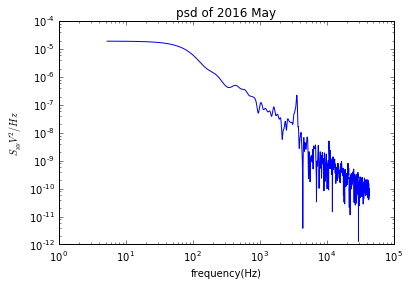

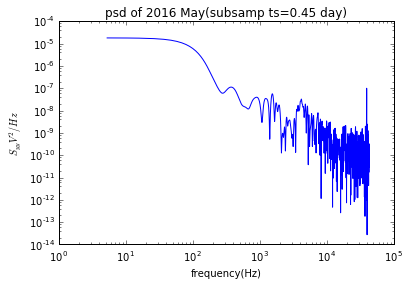

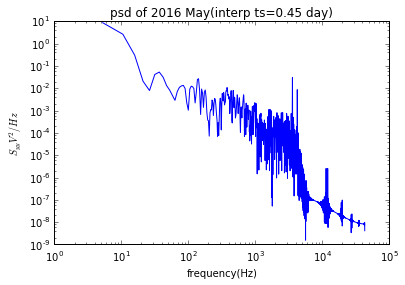

In [39]:
fsamp=24*3600
num=2**14
figure(1)
rawg,rawf=mlab.psd(data2,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(rawf,rawg,label='raw psd')
title('psd of 2016 May')
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

figure(2)
rawg,rawf=mlab.psd(data4,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(rawf,rawg,label='raw psd')
title('psd of 2016 May(subsamp ts=%s day)'%td1)
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

figure(3)
rawg,rawf=mlab.psd(interp1,NFFT=num,Fs=fsamp,window=mlab.window_hanning,noverlap=num/2)
loglog(rawf,rawg,label='raw psd')
title('psd of 2016 May(interp ts=%s day)'%td1)
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')

In [40]:
err=round((dot(d60,d60))**0.5/len(data1),6)
err1=round((dot(d45,d45))**0.5/len(data1),6)
print 'rms error for %s0 day sampling rate is : %s'%(td,err)
print 'rms error for %s day sampling rate is : %s'%(td1,err1)

rms error for 0.60 day sampling rate is : 0.028536
rms error for 0.45 day sampling rate is : 0.028918


As it shows, the rms error for two different sampling rates are very close, and both are very small, which means these two interpolation are effective in data recoverying. We can use this method to increase the sampling rate.